In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import CSP
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

import moabb
from moabb.evaluations import CrossSessionEvaluation
from moabb.paradigms import MotorImagery

%load_ext autoreload
%autoreload 2
from WDataset import WenData

moabb.set_log_level("info")


In [2]:
pipelines = {}

pipelines["CSP+LDA"] = make_pipeline(CSP(n_components=8), LDA())

pipelines["RG+LR"] = make_pipeline(
    Covariances(), TangentSpace(), LogisticRegression(solver="lbfgs")
)


In [3]:
paradigm = MotorImagery()
# Because this is being auto-generated we only use 2 subjects
dataset = WenData()
dataset.subject_list = dataset.subject_list[:2]
datasets = [dataset]
overwrite = False  # set to True if we want to overwrite cached results
evaluation = CrossSessionEvaluation(
    paradigm=paradigm, datasets=datasets, suffix="examples", overwrite=overwrite
)

results = evaluation.process(pipelines)

print(results.head())

2022-12-09 15:35:48,878 WARNING MainThread moabb.paradigms.motor_imagery Choosing from all possible events
2022-12-09 15:35:48,880 INFO MainThread moabb.evaluations.base Processing dataset: Wen dataset
Wen dataset-CrossSession:   0%|          | 0/1 [00:00<?, ?it/s]2022-12-09 15:35:49,162 INFO MainThread moabb.evaluations.base CSP+LDA | Wen dataset | 1 | session_0: Score 0.722
2022-12-09 15:35:49,264 INFO MainThread moabb.evaluations.base CSP+LDA | Wen dataset | 1 | session_1: Score 0.361
2022-12-09 15:35:49,367 INFO MainThread moabb.evaluations.base CSP+LDA | Wen dataset | 1 | session_2: Score 0.750
2022-12-09 15:35:49,446 INFO MainThread moabb.evaluations.base CSP+LDA | Wen dataset | 1 | session_3: Score 0.611
2022-12-09 15:35:49,523 INFO MainThread moabb.evaluations.base CSP+LDA | Wen dataset | 1 | session_4: Score 0.750
2022-12-09 15:35:49,620 INFO MainThread moabb.evaluations.base CSP+LDA | Wen dataset | 1 | session_5: Score 0.417
2022-12-09 15:35:49,695 INFO MainThread moabb.evalu

      score      time  samples subject    session  channels  n_sessions  \
0  0.305556  0.038762    108.0       1  session_0         8          10   
1  0.416667  0.044152    108.0       1  session_1         8          10   
2  0.694444  0.034918    108.0       1  session_2         8          10   
3  0.555556  0.033898    108.0       1  session_3         8          10   
4  0.527778  0.034669    108.0       1  session_4         8          10   

           dataset pipeline  
0  Example dataset    RG+LR  
1  Example dataset    RG+LR  
2  Example dataset    RG+LR  
3  Example dataset    RG+LR  
4  Example dataset    RG+LR  


/tmp/ipykernel_817976/3020309213.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


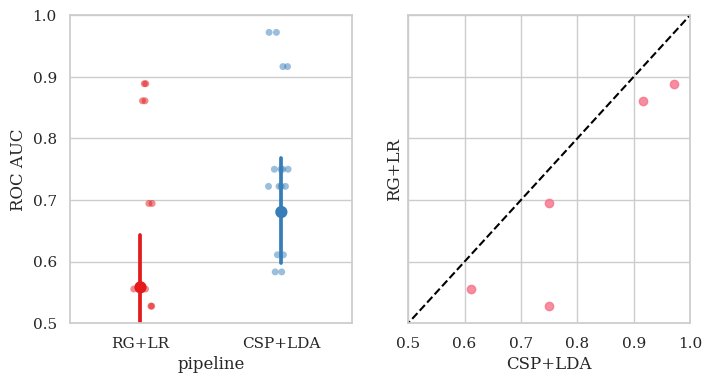

In [4]:
fig, axes = plt.subplots(1, 2, figsize=[8, 4], sharey=True)

sns.stripplot(
    data=results,
    y="score",
    x="pipeline",
    ax=axes[0],
    jitter=True,
    alpha=0.5,
    zorder=1,
    palette="Set1",
)
sns.pointplot(data=results, y="score", x="pipeline", ax=axes[0], palette="Set1")

axes[0].set_ylabel("ROC AUC")
axes[0].set_ylim(0.5, 1)
axes[0].set_zorder=1

paired = results.pivot_table(
    values="score", columns="pipeline", index=["subject", "session"]
)
paired = paired.reset_index()

sns.regplot(data=paired, y="RG+LR", x="CSP+LDA", ax=axes[1], fit_reg=False)
axes[1].plot([0, 1], [0, 1], ls="--", c="k")
axes[1].set_xlim(0.5, 1)

plt.show()
